In [2]:
import pandas as pd

data_ready_en_normalized_undersampled_train = pd.read_csv("data_ready_en_normalized_undersampled_train.csv")
data_en_ready_normalized_test = pd.read_csv("data_en_ready_normalized_test.csv")
data_en_ready_normalized_test

,p_recall,delta,history_seen,history_correct,session_seen,history_incorrect,word_length,differs_from_root,verb,noun,...,conjunction,determiner,interjection,plural,number,phrase,word_freq,ui_language_es,ui_language_it,ui_language_pt
0,1.0,0.000889,0.001110,0.000931,0.000000,0.001221,0.230769,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.095514,1.0,0.0,0.0
1,1.0,0.000007,0.010135,0.009700,0.105263,0.004884,0.307692,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.003705,1.0,0.0,0.0
2,1.0,0.003718,0.000074,0.000078,0.052632,0.000000,0.230769,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.047840,1.0,0.0,0.0
3,1.0,0.004435,0.001480,0.001086,0.000000,0.002442,0.153846,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.003612,1.0,0.0,0.0
4,1.0,0.000005,0.000296,0.000310,0.052632,0.000000,0.615385,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.000101,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999495,1.0,0.000006,0.000370,0.000310,0.000000,0.000407,0.307692,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.002793,1.0,0.0,0.0
999496,1.0,0.000026,0.000444,0.000466,0.000000,0.000000,0.615385,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000739,1.0,0.0,0.0
999497,1.0,0.000009,0.000592,0.000466,0.000000,0.000814,0.307692,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000832,1.0,0.0,0.0
999498,1.0,0.006317,0.000814,0.000776,0.000000,0.000407,0.000000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.426432,0.0,1.0,0.0


In [4]:
from sklearn.linear_model import Lasso

X_train = data_ready_en_normalized_undersampled_train.drop(['p_recall','session_seen','verb','noun','preposition','pronoun','adjective','adverb','conjunction','determiner','interjection','plural','phrase','number','ui_language_es','ui_language_it','ui_language_pt'], axis=1)
y_train = data_ready_en_normalized_undersampled_train['p_recall']
X_train


,delta,history_seen,history_correct,history_incorrect,word_length,differs_from_root,word_freq
0,0.000021,0.002663,0.002406,0.002035,0.000000,0.0,0.426432
1,0.006823,0.000296,0.000310,0.000000,0.153846,0.0,0.091230
2,0.122888,0.000444,0.000388,0.000407,0.076923,1.0,0.165906
3,0.032874,0.000444,0.000466,0.000000,0.153846,0.0,0.012290
4,0.124812,0.008138,0.008225,0.001628,0.153846,0.0,1.000000
...,...,...,...,...,...,...,...
1287849,0.001782,0.000074,0.000000,0.000407,0.384615,0.0,0.002495
1287850,0.000012,0.000148,0.000155,0.000000,0.230769,0.0,0.015475
1287851,0.032392,0.001110,0.001164,0.000000,0.307692,1.0,0.000482
1287852,0.007122,0.002219,0.002328,0.000000,0.230769,0.0,0.079498


In [5]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Create a Ridge regression object
ridge = Ridge()

# Define the grid of hyperparameters to search
param_grid = {'alpha': [0.0001,0.001, 0.01, 0.1, 1, 10]}

# Perform grid search to find the best value of alpha
grid_search = GridSearchCV(ridge, param_grid, cv=3,verbose=3)
grid_search.fit(X_train, y_train)

# Print the best value of alpha
print("Best alpha:", grid_search.best_params_['alpha'])
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END .....................alpha=0.0001;, score=-2.077 total time=   0.0s
[CV 2/3] END ......................alpha=0.0001;, score=0.009 total time=   0.0s
[CV 3/3] END ......................alpha=0.0001;, score=0.000 total time=   0.0s
[CV 1/3] END ......................alpha=0.001;, score=-2.077 total time=   0.0s
[CV 2/3] END .......................alpha=0.001;, score=0.009 total time=   0.0s
[CV 3/3] END .......................alpha=0.001;, score=0.000 total time=   0.0s
[CV 1/3] END .......................alpha=0.01;, score=-2.077 total time=   0.0s
[CV 2/3] END ........................alpha=0.01;, score=0.009 total time=   0.0s
[CV 3/3] END ........................alpha=0.01;, score=0.000 total time=   0.0s
[CV 1/3] END ........................alpha=0.1;, score=-2.077 total time=   0.0s
[CV 2/3] END .........................alpha=0.1;, score=0.009 total time=   0.0s
[CV 3/3] END .........................alpha=0.1;,

In [6]:
best_model.fit(X_train, y_train)

# Print the coefficients
print(best_model.coef_)

[-0.2452717   0.29944587  0.61579928 -1.58249718  0.00722177 -0.00450129
 -0.00948938]


In [7]:
coef_df = pd.DataFrame({'Feature Name': X_train.columns, 'Coefficient': best_model.coef_})

# Print the DataFrame
print(coef_df)

        Feature Name  Coefficient
0              delta    -0.245272
1       history_seen     0.299446
2    history_correct     0.615799
3  history_incorrect    -1.582497
4        word_length     0.007222
5  differs_from_root    -0.004501
6          word_freq    -0.009489


In [8]:
X_test = data_en_ready_normalized_test.drop(['p_recall','session_seen','verb','noun','preposition','pronoun','adjective','adverb','conjunction','determiner','interjection','plural','phrase','number','ui_language_es','ui_language_it','ui_language_pt'], axis=1)
y_test = data_en_ready_normalized_test['p_recall']
X_test

,delta,history_seen,history_correct,history_incorrect,word_length,differs_from_root,word_freq
0,0.000889,0.001110,0.000931,0.001221,0.230769,0.0,0.095514
1,0.000007,0.010135,0.009700,0.004884,0.307692,0.0,0.003705
2,0.003718,0.000074,0.000078,0.000000,0.230769,0.0,0.047840
3,0.004435,0.001480,0.001086,0.002442,0.153846,0.0,0.003612
4,0.000005,0.000296,0.000310,0.000000,0.615385,1.0,0.000101
...,...,...,...,...,...,...,...
999495,0.000006,0.000370,0.000310,0.000407,0.307692,1.0,0.002793
999496,0.000026,0.000444,0.000466,0.000000,0.615385,0.0,0.000739
999497,0.000009,0.000592,0.000466,0.000814,0.307692,0.0,0.000832
999498,0.006317,0.000814,0.000776,0.000407,0.000000,0.0,0.426432


In [9]:
y_pred = best_model.predict(X_test)

In [10]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)

print("MAE:", mae)

MAE: 0.3211199264884377


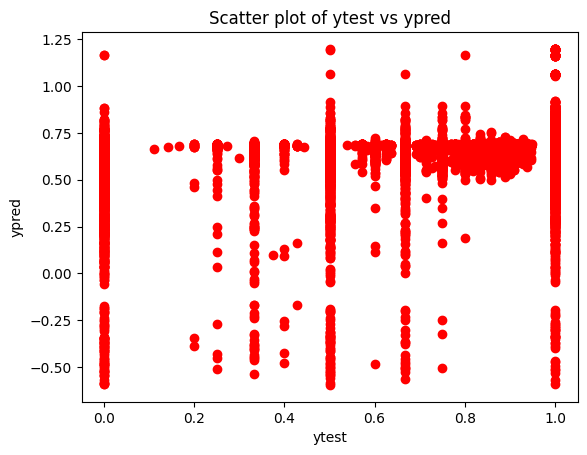

In [11]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, c='red')

# Add labels and title
plt.xlabel('ytest')
plt.ylabel('ypred')
plt.title('Scatter plot of ytest vs ypred')

# Show the plot
plt.show()

In [12]:
y_pred_df = pd.DataFrame(y_pred, columns=["pred"])
y_pred_df["test"] = y_test
y_pred_df

,pred,test
0,0.689132,1.0
1,0.693080,1.0
2,0.689987,1.0
3,0.686853,1.0
4,0.689837,1.0
...,...,...
999495,0.686967,1.0
999496,0.694467,1.0
999497,0.691004,1.0
999498,0.684098,1.0


In [13]:
y_pred_df["test"].corr(y_pred_df["pred"])

0.09076223209660308